<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/UP001_TargetMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Jul  3 01:24:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [3]:
!pip install h2o

import h2o
from h2o.automl import H2OAutoML

     |████████████████████████████████| 128.4MB 102kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.6-py2.py3-none-any.whl size=128412300 sha256=d2de0533153a7771025865386195bef1a6f393ca5036d0b548f5555f9dcbf8b9
  Stored in directory: /root/.cache/pip/wheels/de/4c/dd/4813e95c4b5328b4de2e2e1aa56ca66a547f45d11fe47c3c8a
Successfully built h2o


In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import time
import itertools

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,18 mins 49 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_nxcgsl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [14]:
hdf = h2o.import_file("/content/QMS_NVOC_SORT.csv", destination_frame="hdf")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
hdf.describe()

Rows:2603543
Cols:9




,C1,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
type,int,enum,time,int,int,int,int,int,int
mins,0.0,,1590969600000.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
mean,1301771.0000000128,,1591314899597.5137,0.8801183617862282,1.4049485643217745,16.697359329191052,0.1287238198101587,-0.017736983794775053,0.0009126025573612573
maxs,2603542.0,,1591660200000.0,158862.0,158862.0,157649.0,600.0,15.0,1.0
sigma,751578.27028595,,199532485.6800443,228.1794923589976,340.5286455323046,935.8094186664181,6.699536131823914,0.13610559986275494,0.030195530532466708
zeros,1,,0,2552498,2552478,2481119,2551820,2556426,2601167
missing,0,0,0,0,0,0,0,0,0
0,111744.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,111745.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0
2,111746.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
hdf_nvoc = hdf.group_by("nvoc").count()
hdf_nvoc.get_frame()

nvoc,nrow
0,2.60117e+06
1,2376


In [18]:
features = [f for f in hdf.columns if f not in ['C1', 'a1.ucube_jnr_no', 'a2.firstlogtime', 'nvoc']]
features

['a2.buffer_overflow',
 'a2.pts_advanced_error',
 'a2.stb_rtp_errcnt',
 'a2.no_stream_error',
 'a2.not_decoding_error']

<Figure size 432x288 with 0 Axes>

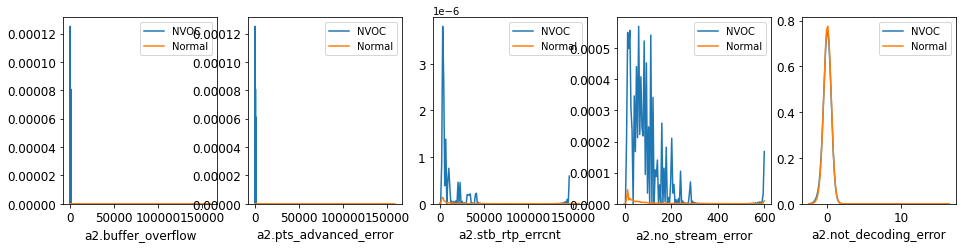

In [22]:
i = 0
t0 = hdf[hdf['nvoc'] == 1].as_data_frame()
t1 = hdf[hdf['nvoc'] == 0].as_data_frame()

# sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(1,5,figsize=(16,24))

for feature in features:
    i += 1
    plt.subplot(6,5,i)
    sns.kdeplot(t0[feature], bw=0.5,label="NVOC")
    sns.kdeplot(t1[feature], bw=0.5,label="Normal")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();
    

imblance가 커서 보기 힘들다. 균형을 맞추어서 다시...

In [26]:
hdf_on = hdf[(hdf['nvoc'] > 0)]
print(hdf_on.shape)

hdf_off = hdf[(hdf['nvoc'] == 0)]
print(hdf_off.shape)

hdf_off = hdf_off[(hdf_off['a2.buffer_overflow'] > 0) | (hdf_off['a2.pts_advanced_error'] > 0) | (hdf_off['a2.stb_rtp_errcnt'] > 0) | (hdf_off['a2.no_stream_error'] > 0) | (hdf_off['a2.not_decoding_error'] > 0)]
hdf_off.shape

(2376, 9)
(2601167, 9)


(76442, 9)

In [37]:
hdf = hdf_on.rbind(hdf_off)
print(hdf.shape)
print(hdf.head())
hdf.tail()

#셔플 안되었지만... 뭐. 상관없지.

(78818, 9)


C1,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
112664,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-07 09:20:00,0,0,0,0,0,1
112665,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-07 09:20:00,0,0,0,0,0,1
112668,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-07 09:50:00,0,0,0,0,0,1
112677,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-07 11:20:00,0,0,0,0,0,1
1.02294e+06,64757BE1B9C2803F780262D9979BEADB1EBCD7FF,2020-06-08 16:10:00,0,0,0,0,0,1
1.02296e+06,64757BE1B9C2803F780262D9979BEADB1EBCD7FF,2020-06-08 19:20:00,0,0,0,0,0,1
1.02296e+06,64757BE1B9C2803F780262D9979BEADB1EBCD7FF,2020-06-08 20:00:00,0,0,0,0,0,1
1.02296e+06,64757BE1B9C2803F780262D9979BEADB1EBCD7FF,2020-06-08 20:00:00,0,0,0,0,0,1
1.36338e+06,8622CBC1C8B6E5F2E7164CA22377114E4736FFB1,2020-06-04 20:00:00,0,0,0,0,0,1
1.36364e+06,8622CBC1C8B6E5F2E7164CA22377114E4736FFB1,2020-06-06 14:30:00,0,0,0,0,0,1


C1,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
2.57064e+06,FC5C2BC2DD2F3E3E43146A677D6DD9C253A577F5,2020-06-04 12:10:00,0,0,0,87,0,0
2.57078e+06,FC5C2BC2DD2F3E3E43146A677D6DD9C253A577F5,2020-06-05 11:40:00,0,0,3759,0,0,0
2.57078e+06,FC5C2BC2DD2F3E3E43146A677D6DD9C253A577F5,2020-06-05 11:50:00,0,0,652,0,0,0
2.57093e+06,FC5C2BC2DD2F3E3E43146A677D6DD9C253A577F5,2020-06-06 12:00:00,0,0,2,0,0,0
2.57108e+06,FC5C2BC2DD2F3E3E43146A677D6DD9C253A577F5,2020-06-07 12:40:00,0,0,737,10,0,0
2.5712e+06,FC5C2BC2DD2F3E3E43146A677D6DD9C253A577F5,2020-06-08 09:50:00,0,0,1,0,0,0
2.5712e+06,FC5C2BC2DD2F3E3E43146A677D6DD9C253A577F5,2020-06-08 10:00:00,0,0,306,1,0,0
2.57121e+06,FC5C2BC2DD2F3E3E43146A677D6DD9C253A577F5,2020-06-08 11:30:00,0,0,955,55,0,0
2.57121e+06,FC5C2BC2DD2F3E3E43146A677D6DD9C253A577F5,2020-06-08 11:40:00,0,0,787,10,0,0
2.58911e+06,FE812BD1FDB81CFB24624BE9CE96C9472A790D1B,2020-06-04 18:20:00,0,0,1,28,0,0


<Figure size 432x288 with 0 Axes>

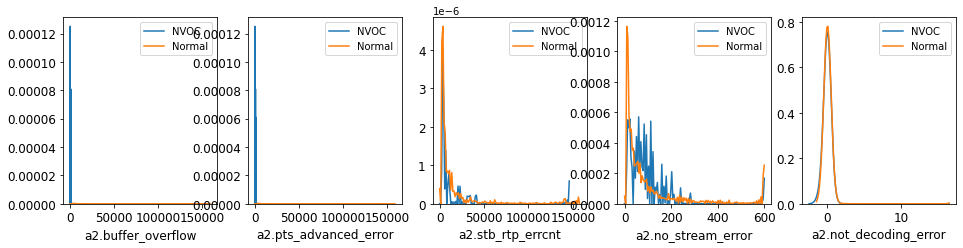

In [34]:
i = 0
t0 = hdf[hdf['nvoc'] == 1].as_data_frame()
t1 = hdf[hdf['nvoc'] == 0].as_data_frame()

# sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(1,5,figsize=(16,24))

for feature in features:
    i += 1
    plt.subplot(6,5,i)
    sns.kdeplot(t0[feature], bw=0.5,label="NVOC")
    sns.kdeplot(t1[feature], bw=0.5,label="Normal")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();